<div>
<img src=https://www.institutedata.com/wp-content/uploads/2019/10/iod_h_tp_primary_c.svg width="300">
</div>

## Lab 4.2.1: Feature Selection

### 1. Load & Explore Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

#### 1.1 Load Data

In [2]:
# Read CSV
wine_csv = pd.read_csv('/Users/damien/Documents/institute_of_data/dat/mod4/winequality_merged.csv')

#### 1.2 Explore Data (Exploratory Data Analysis)

In [3]:
wine_csv.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [4]:
wine_csv.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,0


In [5]:
wine_csv.shape

(6497, 13)

In [6]:
wine_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  red_wine              6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [7]:
wine_csv.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,6497.0,7.215307,1.296434,3.80000,6.40000,7.00000,7.70000,15.90000
volatile acidity,6497.0,0.339666,0.164636,0.08000,0.23000,0.29000,0.40000,1.58000
citric acid,6497.0,0.318633,0.145318,0.00000,0.25000,0.31000,0.39000,1.66000
residual sugar,6497.0,5.443235,4.757804,0.60000,1.80000,3.00000,8.10000,65.80000
chlorides,6497.0,0.056034,0.035034,0.00900,0.03800,0.04700,0.06500,0.61100
free sulfur dioxide,6497.0,30.525319,17.749400,1.00000,17.00000,29.00000,41.00000,289.00000
total sulfur dioxide,6497.0,115.744574,56.521855,6.00000,77.00000,118.00000,156.00000,440.00000
density,6497.0,0.994697,0.002999,0.98711,0.99234,0.99489,0.99699,1.03898
pH,6497.0,3.218501,0.160787,2.72000,3.11000,3.21000,3.32000,4.01000
sulphates,6497.0,0.531268,0.148806,0.22000,0.43000,0.51000,0.60000,2.00000


<AxesSubplot:>

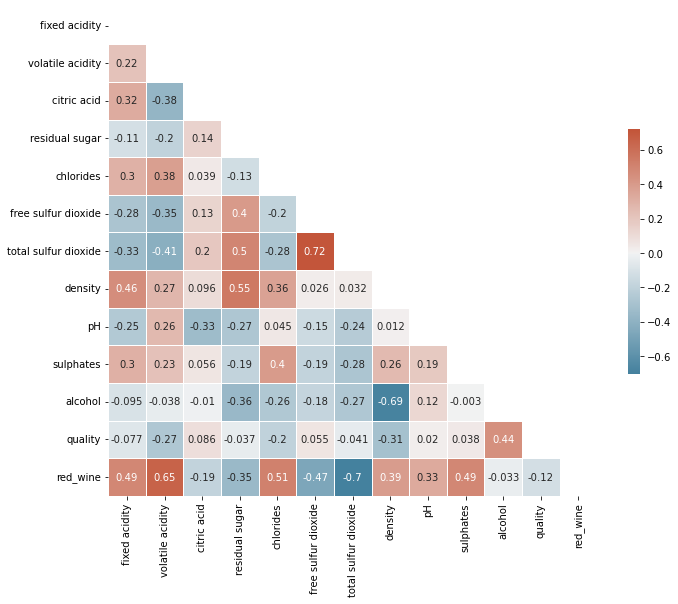

In [8]:
corr = wine_csv.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

fig, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0, annot=True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})




### 2. Set Target Variable

Create a target variable for wine quality.

In [9]:
y = wine_csv['quality']

### 3. Set Predictor Variables

Create a predictor matrix with variables of your choice. State your reason.

In [10]:
corr['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.444319
citric acid             0.085532
free sulfur dioxide     0.055463
sulphates               0.038485
pH                      0.019506
residual sugar         -0.036980
total sulfur dioxide   -0.041385
fixed acidity          -0.076743
red_wine               -0.119323
chlorides              -0.200666
volatile acidity       -0.265699
density                -0.305858
Name: quality, dtype: float64

In [11]:
# Features with highest postive or negative correlation to quality chosen

X = wine_csv[['volatile acidity', 'density', 'chlorides', 'alcohol']]
X

,volatile acidity,density,chlorides,alcohol
0,0.70,0.99780,0.076,9.4
1,0.88,0.99680,0.098,9.8
2,0.76,0.99700,0.092,9.8
3,0.28,0.99800,0.075,9.8
4,0.70,0.99780,0.076,9.4
...,...,...,...,...
6492,0.21,0.99114,0.039,11.2
6493,0.32,0.99490,0.047,9.6
6494,0.24,0.99254,0.041,9.4
6495,0.29,0.98869,0.022,12.8


### 4. Using Linear Regression Create a Model and Test Score

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [13]:
# Train-Test Split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [14]:
# Create a model for Linear Regression

reg = LinearRegression()

# Fit the model with the Training data

reg.fit(X_train, y_train)

# Calculate the score (R^2 for Regression) for Training Data

print('Training score:', reg.score(X_train, y_train))

# Calculate the score (R^2 for Regression) for Testing Data

print('Test score:', reg.score(X_test, y_test))


Training score: 0.2707886547599643
Test score: 0.25213547513049517


### BONUS: Cross validation

In [15]:
# Cross validation 
from sklearn.model_selection import KFold 
from sklearn.metrics import mean_squared_error

In [20]:
# Set up 5-fold cross validation  
k_fold = KFold(5, shuffle=True)
train_scores = []
train_rmse = []
test_scores = []
test_rmse = []

for k, (train, test) in enumerate(k_fold.split(X)):
    
    # Get training and test sets for X and y
    X_train = X.iloc[train, ]
    y_train = y.iloc[train, ]
    X_test = X.iloc[test, ]
    y_test = y.iloc[test, ]
    
    # Fit model with training set
    reg.fit(X_train, y_train)
    
    # Make predictions with training and test set
    train_prediction = reg.predict(X_train)
    test_prediction = reg.predict(X_test)
    
    # Score R2 and RMSE on training and test sets and store in list
    train_scores.append(reg.score(X_train, y_train))
    train_rmse.append(mean_squared_error(y_train, train_prediction, squared=False))
    
    test_scores.append(reg.score(X_test, y_test))
    test_rmse.append(mean_squared_error(y_test, test_prediction, squared=False))
    
# Create a metrics_df dataframe to display r2 and rmse scores

metrics_df = pd.DataFrame({'train_R2':train_scores, 'test_R2':test_scores, 'train_RMSE':train_rmse, 'test_RMSE':test_rmse})


In [21]:
metrics_df

,train_R2,test_R2,train_RMSE,test_RMSE
0,0.272275,0.246830,0.746493,0.751168
1,0.272111,0.244936,0.751973,0.729140
2,0.266317,0.269433,0.747963,0.745548
3,0.274577,0.235827,0.738983,0.780799
4,0.251968,0.320849,0.750963,0.733848


In [24]:
print('train R2:', np.mean(metrics_df.train_R2))
print('test R2:', np.mean(metrics_df.test_R2))
print('train RMSE:', np.mean(metrics_df.train_RMSE))
print('test RMSE:', np.mean(metrics_df.test_RMSE))

train R2: 0.26744974410766675
test R2: 0.2635747908611098
train RMSE: 0.7472749773869769
test RMSE: 0.7481004438746663


### 5. Feature Selection

What's your score (R^2 for Regression) for Testing Data? 

How many feature have you selected? Can you improve your score by selecting different features?

**Please continue with Lab 4.2.2 with the same dataset.**



---



---



> > > > > > > > > © 2021 Institute of Data


---



---



